In [1]:
from Library import * 
import seaborn as sns


In [6]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [7]:
df.fillna(method = 'bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [2]:
data  = pd.read_csv("medical_examination.csv")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


add column BMI 

In [3]:
# lst = list(lst)
# lst = [1 if lst[0][i] > 25 else 0 for i in range(len(lst[0]))]
data["overweight"] =  (data["weight"]/ (data["height"]/100)**2).apply(lambda x: 1 if x > 25 else 0)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


If the value of cholesterol or gluc is 1, make the value 0 If the value is more than 1, make the value 1

In [4]:
data["cholesterol"] = data["cholesterol"].apply(lambda x: 0 if x == 1 else 1)
data["gluc"] = data["gluc"].apply(lambda x: 1 if x > 1 else 0)
data


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


draw depend on cardio 

In [24]:
data_new  = data.copy()
data_new = data_new.melt(id_vars = ["cardio"],value_vars= ['cholesterol','gluc','smoke','alco','active','overweight']) #chuyen cot sang cot cua variable , giu lai cardio
data_new = data_new.groupby(by = ["variable","value","cardio"]).size().reset_index(name = "total")
data_new

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


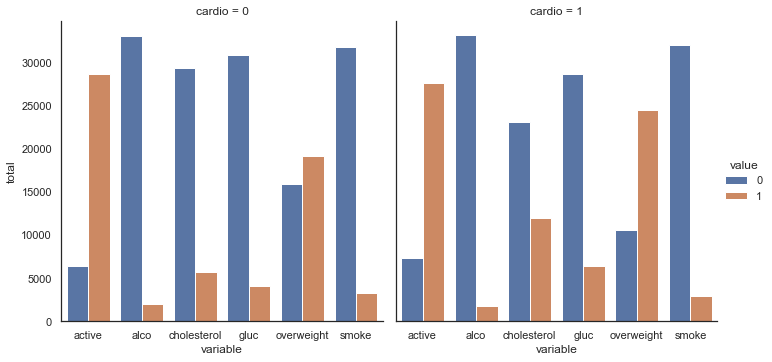

In [25]:
sns.set_theme(style= "white")
draw = sns.catplot(
    data = data_new, 
    kind = 'bar',
    col = "cardio",
    x = "variable",y= "total",hue = "value", # x: dòng, y: cột, hue: giải thích
)


## Clean Data

In [63]:
data_clean = data.copy()
data_clean = data[(data_clean['ap_lo'] < data_clean['ap_hi']) 
                  & (data_clean['height'] > data_clean['height'].quantile(0.025))
                  & (data_clean['height'] < data_clean['height'].quantile(0.975))
                  & (data_clean['weight'] >  data_clean['weight'].quantile(0.025))
                  & (data_clean['weight'] < data_clean['weight'].quantile(0.975))]
data_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


draw heatmap

AssertionError: Argument a must have NDArray type, but got                    id       age    gender    height    weight     ap_hi  \
id           1.000000  0.002702  0.004402  0.001970  0.000569  0.002982   
age          0.002702  1.000000 -0.014423 -0.073567  0.071655  0.020768   
gender       0.004402 -0.014423  1.000000  0.495340  0.119058  0.003412   
height       0.001970 -0.073567  0.495340  1.000000  0.235185  0.001730   
weight       0.000569  0.071655  0.119058  0.235185  1.000000  0.027698   
ap_hi        0.002982  0.020768  0.003412  0.001730  0.027698  1.000000   
ap_lo        0.001278  0.153278  0.060504  0.015663  0.226228  0.074582   
cholesterol  0.005423  0.128940 -0.035658 -0.060969  0.136026  0.024774   
gluc         0.003149  0.087763 -0.021419 -0.031980  0.104778  0.012196   
smoke       -0.001018 -0.041318  0.337779  0.183812  0.051663 -0.001731   
alco        -0.000341 -0.026532  0.167229  0.083514  0.056747  0.000940   
active       0.005424 -0.012440  0.009333 -0.002831 -0.012165 -0.000982   
cardio       0.003513  0.238671  0.004394 -0.022348  0.170455  0.051515   
overweight  -0.000357  0.087911 -0.049086 -0.143406  0.664743  0.019662   

                ap_lo  cholesterol      gluc     smoke      alco    active  \
id           0.001278     0.005423  0.003149 -0.001018 -0.000341  0.005424   
age          0.153278     0.128940  0.087763 -0.041318 -0.026532 -0.012440   
gender       0.060504    -0.035658 -0.021419  0.337779  0.167229  0.009333   
height       0.015663    -0.060969 -0.031980  0.183812  0.083514 -0.002831   
weight       0.226228     0.136026  0.104778  0.051663  0.056747 -0.012165   
ap_hi        0.074582     0.024774  0.012196 -0.001731  0.000940 -0.000982   
ap_lo        1.000000     0.149769  0.074265  0.024055  0.032564  0.002787   
cholesterol  0.149769     1.000000  0.384429  0.013161  0.038217  0.001845   
gluc         0.074265     0.384429  1.000000 -0.005087  0.013266 -0.010435   
smoke        0.024055     0.013161 -0.005087  1.000000  0.339766  0.026730   
alco         0.032564     0.038217  0.013266  0.339766  1.000000  0.026293   
active       0.002787     0.001845 -0.010435  0.026730  0.026293  1.000000   
cardio       0.326462     0.203088  0.088887 -0.020122 -0.011648 -0.036924   
overweight   0.171314     0.125906  0.085818 -0.001012  0.025633 -0.003109   

               cardio  overweight  
id           0.003513   -0.000357  
age          0.238671    0.087911  
gender       0.004394   -0.049086  
height      -0.022348   -0.143406  
weight       0.170455    0.664743  
ap_hi        0.051515    0.019662  
ap_lo        0.326462    0.171314  
cholesterol  0.203088    0.125906  
gluc         0.088887    0.085818  
smoke       -0.020122   -0.001012  
alco        -0.011648    0.025633  
active      -0.036924   -0.003109  
cardio       1.000000    0.141823  
overweight   0.141823    1.000000  

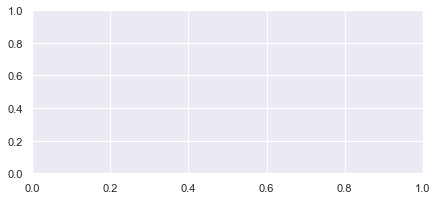

In [64]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (7,3))# sns dc xay dung tren matplot nen sai dc 
cor = data_clean.corr() # tao ma tran tuong quan
ones_like = np.ones_like(cor)
mask = np.triu(ones_like)
sns.heatmap(
    data = cor,
    mask = mask,
    annot = True,
    fmt = '0.1f',
    cmap = 'Blues',
    linecolor = 'white',
    linewidths = 0.3
)
ax.set_title('Medcial correlate')


In [ ]:
data = pd.read_csv('C:/Users/LEGION/Downloads/reddit.csv')
data.isna().sum()
data.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'